**LSTM 신경망 훈련하기**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words= 500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size= 0.2, random_state= 42
)

In [3]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen= 100)
val_seq = pad_sequences(val_input, maxlen= 100)

In [4]:
##LSTM 셀을 이용한 순환층

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length= 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Model Training

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)

model.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only= True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)

history= model.fit(
    train_seq, train_target,
    epochs= 100,
    batch_size= 64,
    validation_data= (val_seq, val_target),
    callbacks= [checkpoint_cb]
)

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6095 - accuracy: 0.6798 - val_loss: 0.5570 - val_accuracy: 0.7396
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4900 - accuracy: 0.7753 - val_loss: 0.4723 - val_accuracy: 0.7878
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4580 - accuracy: 0.7905 - val_loss: 0.4593 - val_accuracy: 0.7842
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4424 - accuracy: 0.7969 - val_loss: 0.4504 - val_accuracy: 0.7858
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4294 - accuracy: 0.8041 - val_loss: 0.4350 - val_accuracy: 0.8038
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4214 - accuracy: 0.8073 - val_loss: 0.4412 - val_accuracy: 0.7872
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4151 - accuracy: 0.8090 - val_loss: 0.4542 - val_accuracy: 0.7840

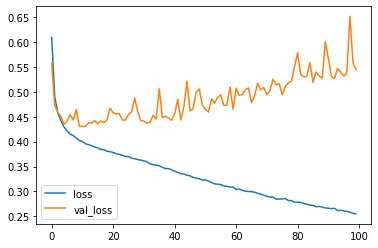

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

**순환층에 Dropout 적용**

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length= 100))
model2.add(keras.layers.LSTM(8, dropout= 0.3))
model2.add(keras.layers.Dense(1, activation= 'sigmoid'))

In [8]:
# Model Training

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)

model2.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only= True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience= 5, restore_best_weights= True)

history= model2.fit(
    train_seq, train_target,
    epochs= 50,
    batch_size= 64,
    validation_data= (val_seq, val_target),
    callbacks= [checkpoint_cb]
)

Epoch 1/50
313/313 [==============================] - 4s 10ms/step - loss: 0.5917 - accuracy: 0.6883 - val_loss: 0.4984 - val_accuracy: 0.7742
Epoch 2/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4742 - accuracy: 0.7809 - val_loss: 0.4497 - val_accuracy: 0.7932
Epoch 3/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4453 - accuracy: 0.7939 - val_loss: 0.4375 - val_accuracy: 0.7952
Epoch 4/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4365 - accuracy: 0.7994 - val_loss: 0.4425 - val_accuracy: 0.7926
Epoch 5/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4320 - accuracy: 0.8008 - val_loss: 0.4378 - val_accuracy: 0.7994
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4294 - accuracy: 0.8004 - val_loss: 0.4805 - val_accuracy: 0.7742
Epoch 7/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4243 - accuracy: 0.8000 - val_loss: 0.4348 - val_accuracy: 0.8006
Epoch

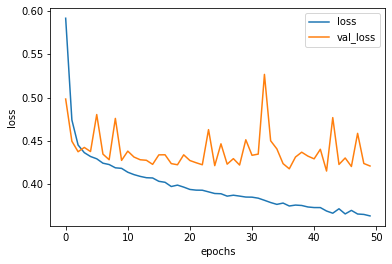

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

**2개의 층 연결하기**

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length= 100))
model3.add(keras.layers.LSTM(8, dropout= 0.3, return_sequences= True))
model3.add(keras.layers.LSTM(8, dropout= 0.3))
model3.add(keras.layers.Dense(1, activation= 'sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Model Training

# Model Training

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)

model3.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only= True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience= 5, restore_best_weights= True)

history= model3.fit(
    train_seq, train_target,
    epochs= 50,
    batch_size= 64,
    validation_data= (val_seq, val_target),
    callbacks= [checkpoint_cb]
)

Epoch 1/50
313/313 [==============================] - 6s 14ms/step - loss: 0.5698 - accuracy: 0.6972 - val_loss: 0.4769 - val_accuracy: 0.7734
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4771 - accuracy: 0.7771 - val_loss: 0.5109 - val_accuracy: 0.7538
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4570 - accuracy: 0.7888 - val_loss: 0.4723 - val_accuracy: 0.7780
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4487 - accuracy: 0.7918 - val_loss: 0.4491 - val_accuracy: 0.7928
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4371 - accuracy: 0.7979 - val_loss: 0.4485 - val_accuracy: 0.7874
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4327 - accuracy: 0.8019 - val_loss: 0.4691 - val_accuracy: 0.7806
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4279 - accuracy: 0.8036 - val_loss: 0.4408 - val_accuracy: 0.7966

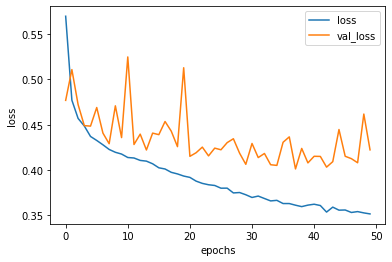

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

**GRU 구조**

In [14]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length= 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation= 'sigmoid'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)
model4.compile(
    optimizer= rmsprop,
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

history = model4.fit(
    train_seq, train_target,
    epochs= 100,
    batch_size= 64,
    validation_data= (val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 4s 10ms/step - loss: 0.4782 - accuracy: 0.7778 - val_loss: 0.4898 - val_accuracy: 0.7702
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4714 - accuracy: 0.7824 - val_loss: 0.4837 - val_accuracy: 0.7792
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4652 - accuracy: 0.7846 - val_loss: 0.4877 - val_accuracy: 0.7788
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4603 - accuracy: 0.7884 - val_loss: 0.4749 - val_accuracy: 0.7782
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4551 - accuracy: 0.7908 - val_loss: 0.4707 - val_accuracy: 0.7822
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4505 - accuracy: 0.7940 - val_loss: 0.4681 - val_accuracy: 0.7800
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4471 - accuracy: 0.7973 - val_loss: 0.4637 - val_accuracy: 0.784

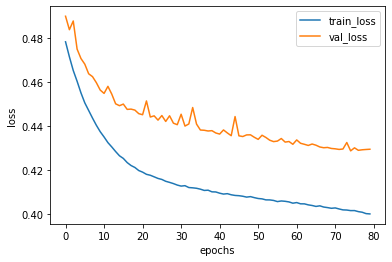

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [19]:
test_seq = pad_sequences(test_input, maxlen= 100)
rnn_model= keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 6ms/step - loss: 0.3875 - accuracy: 0.8248


[0.3874506950378418, 0.8248400092124939]